In [20]:
# Import libraries:
import xarray
import numpy as np
import pandas as pd
import os
#from six.moves import urllib
from glob import glob
import matplotlib.pyplot as plt
import matplotlib  as mpl 
import pickle
import pyart
import math
from pandas.core.common import flatten
from datetime import datetime
%matplotlib inline
#%matplotlib widget
from datetime import datetime
from netCDF4 import Dataset

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Import tobac itself:
import tobac
#Disable a couple of warnings:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)

In [4]:
drop_list = ['name_polarris','freq_polarris','lat_radar','lon_radar','elev_radar','coverage_radar','kdp01',
'rhohv01','vdop01','vrad01','elev01','vang01','hgt','zdr01']

In [5]:
path = "/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-19_21_00_00.nc"
data = xarray.open_dataset(path, drop_variables = drop_list)

In [6]:
grid_lat = data['latitude']

In [7]:
grid_lon = data['longitude']

In [8]:
path = "/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-*_00.nc"
files = sorted(glob(path))
savedir ="/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF"
for n, i in enumerate(files):
    print(i)
    #data = xarray.open_dataset(i,drop_variables = drop_list)
    if n == 0:
        data1 = xarray.open_dataset(i,drop_variables = drop_list)
        #ref1 = data1['zhh01']
        data2 = xarray.open_dataset(files[n+1],drop_variables = drop_list)
        #ref2 = data2['zhh01']
        arr = xarray.concat([data1['zhh01'].max(axis=0),data2['zhh01'].max(axis=0)],'time')
    else:
        
        data1 = xarray.open_dataset(i,drop_variables = drop_list)
        #ref = data['zhh01']
        if n == 6:
            refl = data1['zhh01'].max(axis=0)
            bad = np.where(refl > 100)
            refl[bad] = -999
            arr = xarray.concat([arr, refl],'time')
        else:
            arr = xarray.concat([arr,data1['zhh01'].max(axis=0)],'time') 
    data1.close()
    data2.close()

rng = pd.date_range(pd.Timestamp("2013-06-19 21:00"),periods=181, freq='min')
arr = arr.assign_coords(time=rng)    
#Set up directory to save output and plots:
dxy = 0.25
dt = 1
#del ds
savedir='tobac_Save_wrf1min'
if not os.path.exists(savedir):
    os.makedirs(savedir)



/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-19_21_00_00.nc
/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-19_21_01_00.nc
/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-19_21_02_00.nc
/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-19_21_03_00.nc
/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-19_21_04_00.nc
/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-19_21_05_00.nc
/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-19_21_06_00.nc
/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-19_21_07_00.nc
/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-19_21_08_00.nc
/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-19_21_09_00.nc
/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-19_21_10_00.nc
/Volumes/Seagate Backup Plus Drive/KNB_TTU/

In [9]:
savedir='tobac_Save_wrf1min'
if not os.path.exists(savedir):
    os.makedirs(savedir)

In [10]:
# Dictionary containing keyword options (could also be directly given to the function)
parameters_features={}
parameters_features['position_threshold']='weighted_diff'
parameters_features['sigma_threshold']= 0.5 #0.5 is the default
parameters_features['threshold']= 10 
#parameters_features['min_num']=0
#parameters_features['min_distance']=5 #0 #15
#parameters_features['n_erosion_threshold']=0
#parameters_features['n_min_threshold']=0

In [11]:
maxrefl_iris=arr.to_iris()
# Feature detection based on based on surface precipitation field and a range of thresholds
print('starting feature detection based on multiple thresholds')
Features_iris=tobac.feature_detection_multithreshold(maxrefl_iris,dxy,**parameters_features)
Features=Features_iris.to_xarray()
print('feature detection done')
Features.to_netcdf(os.path.join(savedir,'Features.nc'))
print('features saved')

/Users/kelcy/opt/anaconda3/envs/TTU_KNB/lib/python3.8/site-packages/iris/fileformats/_ff.py:819: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def _parse_binary_stream(file_like, dtype=np.float, count=-1):


starting feature detection based on multiple thresholds


/Users/kelcy/opt/anaconda3/envs/TTU_KNB/lib/python3.8/site-packages/skimage/morphology/_skeletonize.py:241: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=np.bool)
/Users/kelcy/opt/anaconda3/envs/TTU_KNB/lib/python3.8/site-packages/skimage/morphology/_skeletonize.py:256: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
 

feature detection done
features saved


In [12]:
# Dictionary containing keyword arguments for segmentation step:
parameters_segmentation={}
parameters_segmentation['method']='watershed'
parameters_segmentation['threshold']=10 #30  # mm/h mixing ratio
parameters_segmentation['ISO_dilate']=10 #this is the size 
#parameters_segmentation['features']
#parameters_segmentation['field']
#parameters_segmentation['dxy']
#parameters_segmentation['target']
#parameters_segmentation['level']
#parameters_segmentation['method']
#parameters_segmentation['max_distance']
#Maximum distance from a marker allowed to be classified as
        #belonging to that cell. Default is None.
#parameters_segmentation['vertical_coord']

In [13]:
Features_df=Features.to_dataframe()

# Perform Segmentation and save resulting mask to NetCDF file:
print('Starting segmentation based on reflectivity')
Mask_iris,Features_Precip =tobac.segmentation.segmentation(Features_df,maxrefl_iris,dxy,**parameters_segmentation)
#Mask,Features_Precip=tobac.themes.tobac_v1.segmentation(Features,maxrefl,dxy,**parameters_segmentation)
Features_Precip=Features_Precip.to_xarray()
Mask=xarray.DataArray.from_iris(Mask_iris)
Mask = Mask.to_dataset()


#Mask,Features_Precip=segmentation(Features,maxrefl,dxy,**parameters_segmentation)
print('segmentation based on reflectivity performed, start saving results to files')
Mask.to_netcdf(os.path.join(savedir,'Mask_Segmentation_refl.nc'))                
Features_Precip.to_netcdf(os.path.join(savedir,'Features_Precip.nc'))
print('segmentation reflectivity performed and saved')

Starting segmentation based on reflectivity
['iso_dilate:10']
segmentation based on reflectivity performed, start saving results to files
segmentation reflectivity performed and saved


In [14]:
areas = np.zeros([(len(Features['index'])+1)])
#Mask = Mask.to_dataset()
frame_features = Features.groupby('frame')

for frame_i, features_i in frame_features: 
    mask_i = Mask['segmentation_mask'][frame_i,:,:].values
    for i in np.unique(mask_i):
        feature_area_i = np.where(mask_i == i)
        areas[i] = len(feature_area_i[0])

#areas = large_list[1:,1]
#var = Features['feature'].copy(data = areas[1:])
#var = var.rename("areas")
#var = Features_Precip['feature'].copy(data = areas[1:])
var = Features['feature'].copy(data = areas[1:])
var = var.rename("areas")
Features_Precip = xarray.merge([Features_Precip,var], compat = 'override')
Features = xarray.merge([Features,var], compat = 'override')
Features_Precip.to_netcdf(os.path.join(savedir, 'Features_Precip.nc'))
Features.to_netcdf(os.path.join(savedir,'Features.nc'))
Mask = Mask.to_array()
Features_df=Features.to_dataframe()
print('features saved')

features saved


In [15]:
# Dictionary containing keyword arguments for the linking step:
parameters_linking={}
parameters_linking['stubs'] = 5
parameters_linking['method_linking']='predict'
parameters_linking['adaptive_stop']=0.2
parameters_linking['adaptive_step']=0.95
parameters_linking['extrapolate']=2 #was 1 - the number of frames to extrapolate to
parameters_linking['order']=2 #Order of polynomial for extrapolating
parameters_linking['subnetwork_size']=100 #50 #100
parameters_linking['memory']= 2
#parameters_linking['time_cell_min']=1
parameters_linking['v_max']=2.0#1.0#.5
parameters_linking['d_min']= None #5

In [16]:
# Perform trajectory linking using trackpy and save the resulting DataFrame:

#Track=tobac.themes.tobac_v1.linking_trackpy(Features,Mask,dt=dt,dxy=dxy,**parameters_linking)
Features_df=Features.to_dataframe()
Track=tobac.linking_trackpy(Features_df,Mask_iris,dt=dt,dxy=dxy,**parameters_linking)
Track = Track.to_xarray()
Track.to_netcdf(os.path.join(savedir,'Track.nc'))

Frame 180: 225 trajectories present.


In [17]:
Track = xarray.open_dataset(savedir+"/Track.nc")
Features = xarray.open_dataset(savedir+"/Features.nc")
refl_mask = xarray.open_dataset(savedir+"/Mask_Segmentation_refl.nc")
refl_features = xarray.open_dataset(savedir+"/Features_Precip.nc")

In [18]:
path = "/Volumes/Seagate Backup Plus Drive/KNB_TTU/NUWRF/1min_nuwrf_arr_2013-06-*_00.nc"
files = sorted(glob(path))
grid_lat = data['latitude']
grid_lon = data['longitude']
rng = pd.date_range(pd.Timestamp("2013-06-19 21:00"),periods=181, freq='min')

50


Text(0.5, 0.98, '2013-06-19 21:50:00')

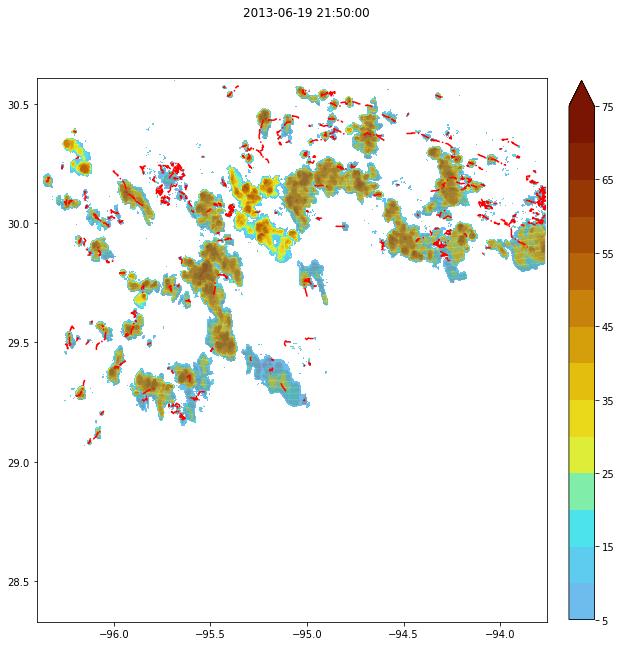

In [22]:
frame = 50
print(frame)
data1 = xarray.open_dataset(files[frame],drop_variables = drop_list)
refl = data1['zhh01'].max(axis=0)
grid_lat = data1['latitude']
grid_lon = data1['longitude']

if frame == 6:
    bad = np.where(refl > 100)
    refl[bad] = -999
ref_levels = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle(str(rng[frame]))# + 'rhohv = '+str(rho) + ', ref > ' + str(ref))


    
refplt = ax.contourf(grid_lon,grid_lat, refl, extend = 'max',levels = ref_levels,cmap='pyart_LangRainbow12',origin = 'lower', vmin=-24, vmax=72)#,extent = [0,-10000,-20000,-10000])
fig.colorbar(refplt,fraction=0.046, pad=0.04)
i = np.where(refl_mask['segmentation_mask'][frame,:,:] > 0)

x = [grid_lat[n].values for n in zip(i[0],i[1])]
y = [grid_lon[n].values for n in zip(i[0],i[1])]

imcell2 = ax.scatter(y,x,s = 0.1,c = 'gray', marker = '.',alpha = 0.25)
    
data1.close()


for j in np.unique(Track['cell']):
    #print(i)
    if math.isfinite(j):
        track_i = np.where(Track['cell'] == j)
        if np.any(Track['frame'][track_i] == frame):

            xx = [grid_lat[n].values for n in zip(Track['hdim_1'][track_i].values.round().astype(int),Track['hdim_2'][track_i].values.round().astype(int))]
            yy = [grid_lon[n].values for n in zip(Track['hdim_1'][track_i].values.round().astype(int),Track['hdim_2'][track_i].values.round().astype(int))]

            ax.plot( np.ravel(yy),np.ravel(xx), '-.',color='r')

            #ax.text(yy[-1],xx[-1], f'{int(i)}',rotation = 45, fontsize = 7)
        else:
            continue
    else:
        continue
 


## fig.savefig('20130619_'+str(frame)+'.png')


